In [4]:
from call_functions import *
from matplotlib import pyplot as plt, patches
import plotly.express as px

In [5]:
def Get_A_B(Nx,a=1,g=1,gain=1):
    # ------------------------------

    x0 = 0
    L = 2 * np.pi
    Nf = Nx // 2
    dx = L / Nx
    Lx = L - dx
    xspan = np.arange(x0, Lx + dx, dx)

    # ------------------------------
    # 2) True matrix A not in Fourier
    O = np.zeros((Nx, Nx))
    I = np.eye(Nx)
    G = Matrix_A_dz(Nx, dx)
    _, C = GetC(np.abs(xspan - np.pi) <= a)
    C = -np.dot(C.T, C)
    A = np.block([[O, -I], [G, O]])
    B = np.block([[O, O], [O, C]])
    return A, B

def Get_fA_fB(Nx,a=1,g=1,gain=1):
    # ------------------------------

    L = 2 * np.pi
    Nf = Nx // 2
    dx = L / Nx

    # ------------------------------
    # 3) True matrix A in Fourier
    fO = np.zeros((2 * Nf + 1, 2 * Nf + 1))
    fI = -np.eye(2 * Nf + 1)
    fF = np.diag(np.abs(np.concatenate((np.arange(0, Nf + 1), np.arange(-Nf, 0)))))
    frequences = fftfreq(Nx, dx) * 2 * np.pi  # Assuming the previously defined fftfreq function
    fC = np.real(-((a * np.exp((-1j * np.pi) * (frequences.reshape(-1, 1) - frequences))) / np.pi) * np.sinc(a * (frequences.reshape(-1, 1) - frequences) / np.pi))
    fA = np.block([[fO, fI], [fF, fO]])
    fB = np.block([[fO, fO], [fO, fC]])

    return fA, fB

def a_b_circle(x,y,radius):
    theta = np.linspace( 0 , 2 * np.pi , 150 )
    a = x + radius * np.cos( theta )
    b = y + radius * np.sin( theta )
    return a,b

In [6]:
Nx = 2**1 + 1
A, B = Get_A_B(Nx)
fA, fB = Get_fA_fB(Nx)

eigenval_A, eigenvect_A = np.linalg.eig(A)
eigenval_B, eigenvect_B = np.linalg.eig(B)
eigenval_fA, eigenvect_fA = np.linalg.eig(fA)
eigenval_fB, eigenvect_fB = np.linalg.eig(fB)
eigenval_AB, eigenvect_AB = np.linalg.eig(A+B)
eigenval_fAB, eigenvect_fAB = np.linalg.eig(fA+fB)

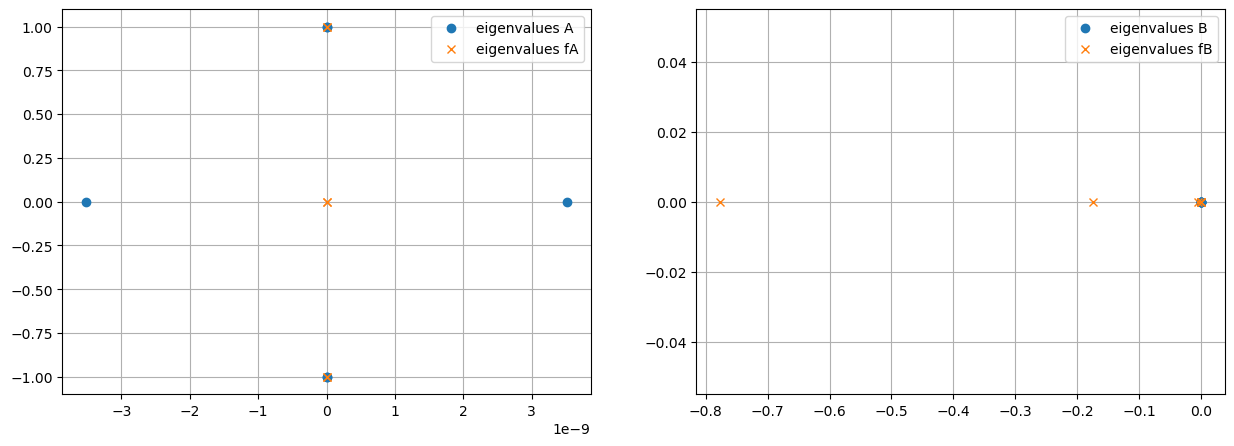

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.real(eigenval_A),np.imag(eigenval_A),'o',label='eigenvalues A')
plt.plot(np.real(eigenval_fA),np.imag(eigenval_fA),'x',label='eigenvalues fA')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(np.real(eigenval_B),np.imag(eigenval_B),'o',label='eigenvalues B')
plt.plot(np.real(eigenval_fB),np.imag(eigenval_fB),'x',label='eigenvalues fB')
plt.legend()
plt.grid()
plt.show()

In [11]:
lambda_ = 1

A0 = A - lambda_*np.eye(Nx*2)
delta_A0 = B + lambda_*np.eye(Nx*2)
eigenval_A0, eigenvect_A0 = np.linalg.eig(A0)
C = np.linalg.cond(eigenvect_A0,p=2)*np.linalg.norm(delta_A0,ord=2)

fA0 = fA - lambda_*np.eye(Nx*2)
delta_fA0 = fB + lambda_*np.eye(Nx*2)
eigenval_fA0, eigenvect_fA0 = np.linalg.eig(fA0)
fC = np.linalg.cond(eigenvect_fA0,p=2)*np.linalg.norm(delta_fA0,ord=2)

In [12]:
C, fC

(6320528336055017.0, 9007199254740991.0)

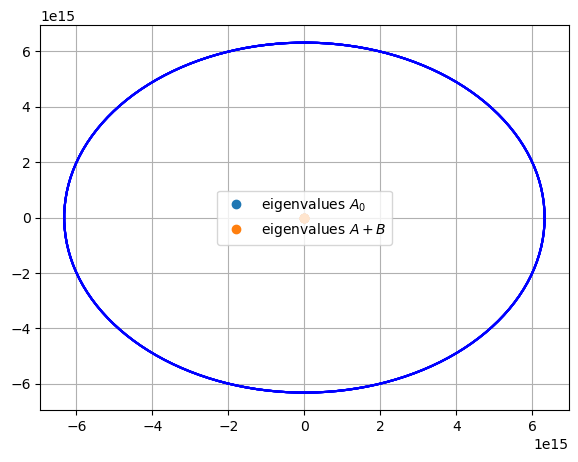

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.real(eigenval_A0),np.imag(eigenval_A0),'o',label=r'eigenvalues $A_0$')
plt.plot(np.real(eigenval_AB),np.imag(eigenval_AB),'o',label=r'eigenvalues $A + B$')
for i, k in enumerate(eigenval_A0):
    plt.plot(a_b_circle(np.real(k),np.imag(k),C)[0],a_b_circle(np.real(k),np.imag(k),C)[1],'b')
plt.Circle(( -0.6 , 0 ), 0.2)
plt.legend()
plt.grid()